In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from collections import Counter
from boruta import BorutaPy
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
pip install Boruta

In [ ]:
data = pd.read_csv("/content/spotify.csv")
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920.0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920.0
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920.0
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920.0
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920.0


In [ ]:
data.shape

(127165, 19)

In [ ]:
data.isnull().sum().sum()

1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127165 entries, 0 to 127164
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      127165 non-null  float64
 1   artists           127165 non-null  object 
 2   danceability      127165 non-null  float64
 3   duration_ms       127165 non-null  int64  
 4   energy            127165 non-null  float64
 5   explicit          127165 non-null  int64  
 6   id                127165 non-null  object 
 7   instrumentalness  127165 non-null  float64
 8   key               127165 non-null  int64  
 9   liveness          127165 non-null  float64
 10  loudness          127165 non-null  float64
 11  mode              127165 non-null  int64  
 12  name              127165 non-null  object 
 13  popularity        127165 non-null  int64  
 14  release_date      127165 non-null  object 
 15  speechiness       127165 non-null  float64
 16  tempo             12

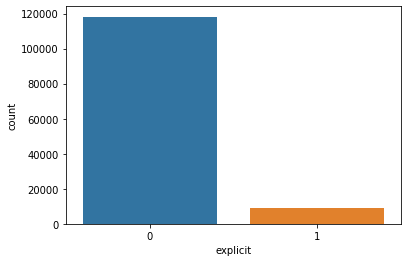

In [ ]:
sns.countplot(x='explicit',data=data)

In [ ]:
data['explicit'].value_counts()

0    118202
1      8963
Name: explicit, dtype: int64

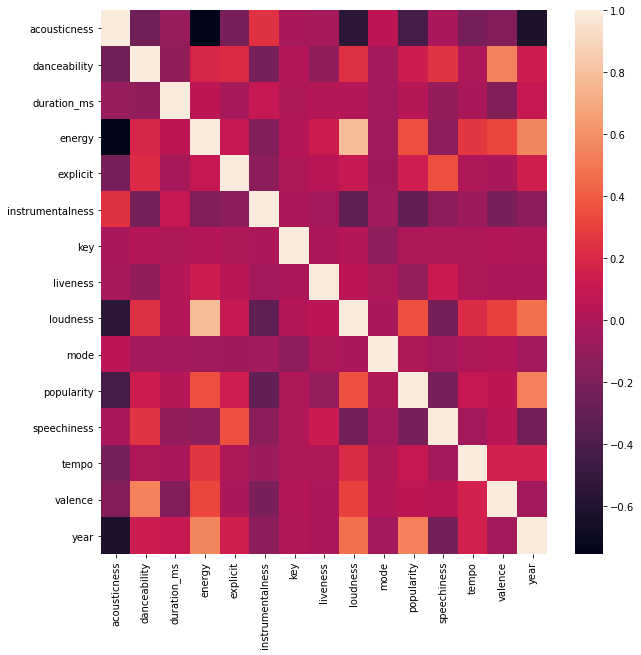

In [ ]:
cormat = data.corr()
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cormat)

In [ ]:
def correlation(data, threshold):
  col_corr = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]>threshold):
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

corr_features = correlation(data,0.80)
len(set(corr_features))
corr_features 

set()

In [ ]:
x = data.drop(['id','name','popularity','release_date','year'],axis=1)

In [ ]:
x

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,0.0936,149.976,0.6340
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,0.0534,86.889,0.9500
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,0.1740,97.600,0.6890
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,0.0425,127.997,0.0422
4,0.295000,['Mixe'],0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,0.0768,122.076,0.2990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127160,0.984000,"['Igor Stravinsky', 'The Symphony Orchestra']",0.508,139440,0.183,0,0.239000,9,0.7000,-19.748,0,0.0408,125.146,0.5310
127161,0.989000,['Κώστας Ρούκουνας'],0.370,194453,0.262,0,0.008800,9,0.1490,-11.557,1,0.0981,87.636,0.2210
127162,0.986000,['Fréhel'],0.594,179507,0.160,0,0.000040,9,0.3080,-12.437,1,0.0770,116.897,0.5290
127163,0.994000,"['Petros Epitropakis', 'Antonis Kalampousis']",0.206,168307,0.335,0,0.789000,5,0.5130,-13.898,1,0.0416,96.229,0.2750


In [ ]:
y = data['explicit']

In [ ]:
lbl = LabelEncoder()

In [ ]:
x = x.apply(lbl.fit_transform)
x

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,4720,16153,788,13293,1422,0,2222,5,1103,13594,0,714,58099,1312
1,4372,239,1042,10286,1715,0,3757,5,633,18961,0,312,14044,1629
2,4722,16153,837,12478,1384,0,977,0,1243,14124,1,852,21805,1368
3,1243,18741,920,40617,1996,0,5194,2,852,18911,1,203,44520,200
4,4024,17466,894,12734,1905,1,1946,10,1126,20186,0,546,39988,977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127160,4713,11197,698,8666,1381,0,4632,9,1424,6585,0,186,42332,1209
127161,4718,27533,560,18566,1460,0,3477,9,873,14665,1,759,14562,899
127162,4715,8921,784,15408,1358,0,1204,9,1032,13785,1,548,36032,1207
127163,4723,19387,396,13289,1533,0,5182,5,1237,12324,1,194,20779,953


In [ ]:
smk = SMOTETomek(random_state=20)
X_res,Y_res = smk.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Orginal data {}".format(Counter(y)))
print("Smotetomek data {}".format(Counter(Y_res)))

Orginal data Counter({0: 118202, 1: 8963})
Smotetomek data Counter({0: 117965, 1: 117965})


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_res,Y_res,test_size = 0.30,random_state = 42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((165151, 14), (70779, 14), (165151,), (70779,))

In [ ]:
RFC = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1)

In [ ]:
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = RFC.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
confusion_matrix(y_test,y_pred)

array([[35326,     0],
       [    0, 35453]])

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     35326\n           1       1.00      1.00      1.00     35453\n\n    accuracy                           1.00     70779\n   macro avg       1.00      1.00      1.00     70779\nweighted avg       1.00      1.00      1.00     70779\n'

In [ ]:
RFC.score(x_train,y_train)


1.0

In [ ]:
RFC.score(x_test,y_test)

1.0

In [ ]:
train_accuracy_score = []
test_accuracy = []
for depth in range(1,10):
  model  =  RandomForestClassifier(max_depth=depth,random_state= 42)
  model.fit(x_train,y_train)
  train_accuracy_score.append(model.score(x_train,y_train))
  test_accuracy.append(model.score(x_test,y_test))

In [ ]:
frame  = pd.DataFrame({'max_depth': range(1,10),"train_accuracy":train_accuracy_score,"test_accuracy": test_accuracy})
frame

,max_depth,train_accuracy,test_accuracy
0,1,0.992256,0.992371
1,2,0.999164,0.998969
2,3,1.000000,1.000000
3,4,1.000000,1.000000
4,5,1.000000,1.000000
5,6,1.000000,1.000000
6,7,1.000000,1.000000
7,8,1.000000,1.000000
8,9,1.000000,1.000000


No handles with labels found to put in legend.


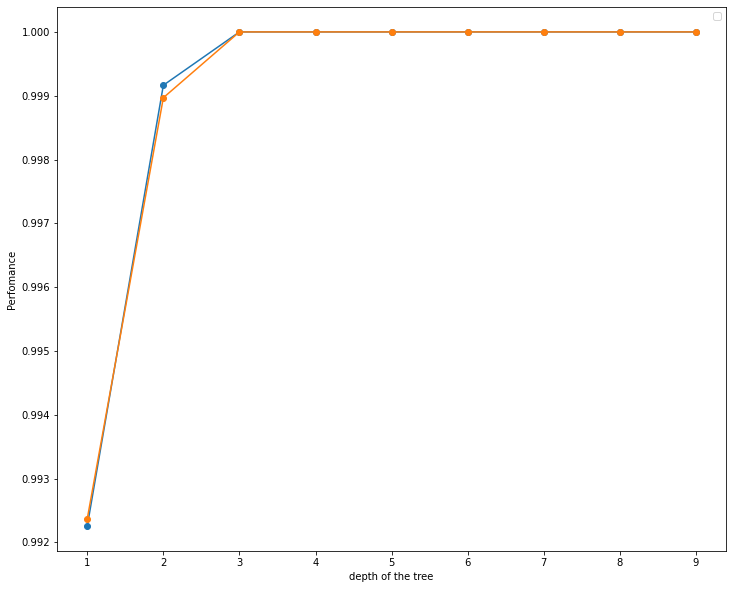

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(frame['max_depth'],frame["train_accuracy"],marker = "o")
plt.plot(frame['max_depth'],frame['test_accuracy'],marker = "o")
plt.xlabel("depth of the tree")
plt.ylabel("Perfomance")
plt.legend()
